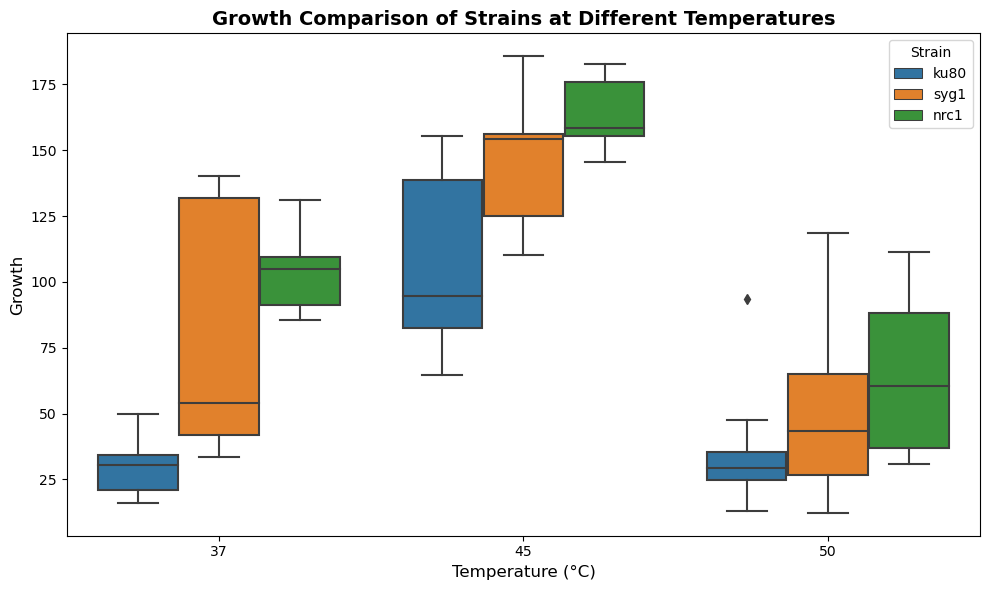

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_syg1_nrc1_growth_data.csv"
df = pd.read_csv(file_path, skiprows=1)

# === Extract and label each strain's data ===
ku80 = df.iloc[:, [0, 1, 2, 3]].copy()
ku80.columns = ["Temperature", "Rep1", "Rep2", "Rep3"]
ku80["Strain"] = "ku80"

syg1 = df.iloc[:, [6, 7, 8, 9]].copy()
syg1.columns = ["Temperature", "Rep1", "Rep2", "Rep3"]
syg1["Strain"] = "syg1"

nrc1 = df.iloc[:, [12, 13, 14, 15]].copy()
nrc1.columns = ["Temperature", "Rep1", "Rep2", "Rep3"]
nrc1["Strain"] = "nrc1"

# === Combine and reshape to long format ===
combined = pd.concat([ku80, syg1, nrc1], ignore_index=True)
melted = pd.melt(combined, id_vars=["Temperature", "Strain"], 
                 value_vars=["Rep1", "Rep2", "Rep3"],
                 var_name="Replicate", value_name="Growth")
melted.dropna(inplace=True)
melted["Temperature"] = melted["Temperature"].astype(str)

# === Create box plot ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x="Temperature", y="Growth", hue="Strain")
plt.title("Growth Comparison of Strains at Different Temperatures", fontsize=14, fontweight='bold')
plt.ylabel("Growth", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.legend(title="Strain")
plt.tight_layout()
plt.show()



=== Two-way ANOVA Table ===
                                sum_sq    df          F        PR(>F)
C(Strain)                 33963.015185   2.0  19.858254  2.053806e-07
C(Temperature)            99871.453333   2.0  58.395072  4.509227e-15
C(Strain):C(Temperature)   4391.920370   4.0   1.283983  2.858073e-01
Residual                  53873.566111  63.0        NaN           NaN

=== Tukey HSD Results ===
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
ku80_37 ku80_45   75.4667    0.0   31.1885 119.7448   True
ku80_37 ku80_50    5.8778    1.0  -38.4004   50.156  False
ku80_37 nrc1_37   74.1056 0.0003    24.601 123.6101   True
ku80_37 nrc1_45  133.5889    0.0   84.0844 183.0934   True
ku80_37 nrc1_50   34.8889 0.3793  -14.6156  84.3934  False
ku80_37 syg1_37   46.6778 0.0313    2.3996   90.956   True
ku80_37 syg1_45  115.9111    0.0   71.6329 160.1893   True
ku80

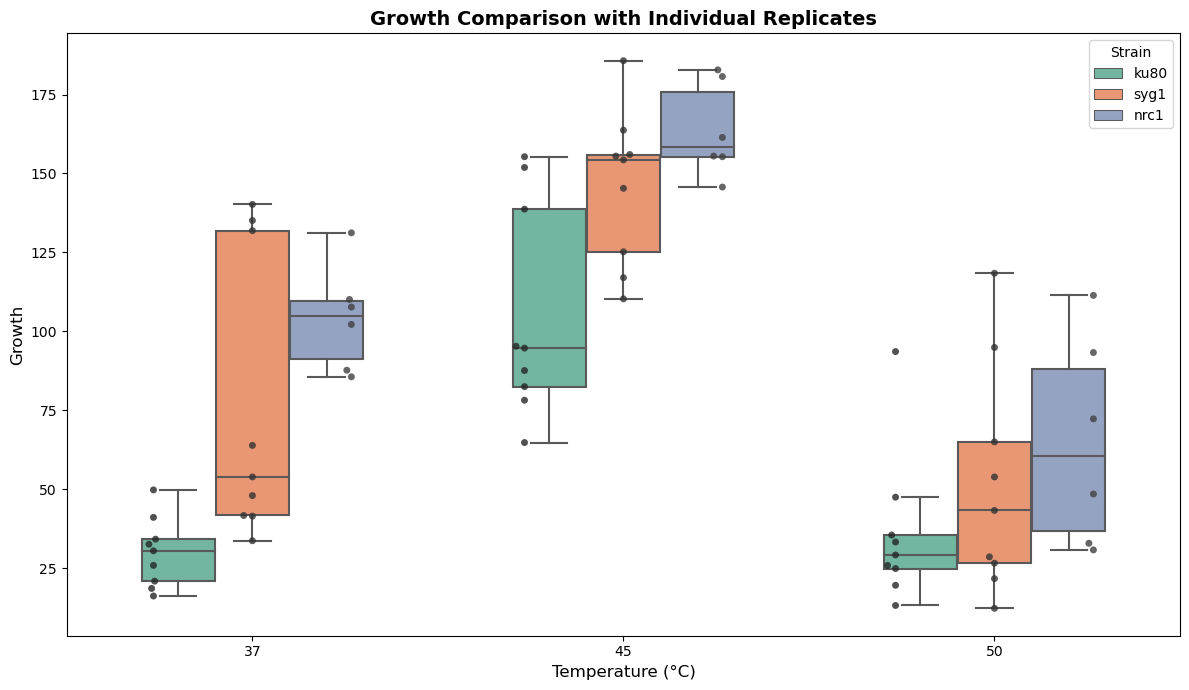

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# === Load and clean the dataset ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_syg1_nrc1_growth_data.csv"
df = pd.read_csv(file_path, skiprows=1)

# Extract and label each strain's data
ku80 = df.iloc[:, [0, 1, 2, 3]].copy()
ku80.columns = ["Temperature", "Rep1", "Rep2", "Rep3"]
ku80["Strain"] = "ku80"

syg1 = df.iloc[:, [6, 7, 8, 9]].copy()
syg1.columns = ["Temperature", "Rep1", "Rep2", "Rep3"]
syg1["Strain"] = "syg1"

nrc1 = df.iloc[:, [12, 13, 14, 15]].copy()
nrc1.columns = ["Temperature", "Rep1", "Rep2", "Rep3"]
nrc1["Strain"] = "nrc1"

# Combine and reshape to long format
combined = pd.concat([ku80, syg1, nrc1], ignore_index=True)
melted = pd.melt(combined, id_vars=["Temperature", "Strain"],
                 value_vars=["Rep1", "Rep2", "Rep3"],
                 var_name="Replicate", value_name="Growth")
melted.dropna(inplace=True)
melted["Temperature"] = melted["Temperature"].astype(str)

# === Two-way ANOVA ===
model = ols('Growth ~ C(Strain) + C(Temperature) + C(Strain):C(Temperature)', data=melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-way ANOVA Table ===")
print(anova_table)

# === Tukey HSD ===
melted["Group"] = melted["Strain"] + "_" + melted["Temperature"]
tukey_result = pairwise_tukeyhsd(endog=melted["Growth"], groups=melted["Group"], alpha=0.05)
print("\n=== Tukey HSD Results ===")
print(tukey_result)

# === Plotting: Boxplot + Swarmplot ===
plt.figure(figsize=(12, 7))
sns.boxplot(data=melted, x="Temperature", y="Growth ()", hue="Strain", palette="Set2", width=0.6, fliersize=0)
sns.swarmplot(data=melted, x="Temperature", y="Growth", hue="Strain", dodge=True, color=".25", alpha=0.8)

plt.title("Growth Comparison with Individual Replicates", fontsize=14, fontweight='bold')
plt.ylabel("Growth", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Strain")
plt.tight_layout()
plt.show()


### second batch repeated with inoculum pregerminated at 45 oC (June 2 2025)


=== Two-way ANOVA Table ===
                                 sum_sq    df           F        PR(>F)
C(Strain)                   3229.849630   2.0   10.810395  8.244123e-04
C(Temperature)            104729.360741   2.0  350.532021  3.859619e-15
C(Strain):C(Temperature)    1899.159259   4.0    3.178269  3.854597e-02
Residual                    2688.953333  18.0         NaN           NaN

=== Tukey HSD Results ===
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
 ku80_37C  ku80_45C   89.4667    0.0   54.4998  124.4335   True
 ku80_37C  ku80_50C  -76.1333    0.0 -111.1002  -41.1665   True
 ku80_37C nrc_1_37C      41.5 0.0134    6.5331   76.4669   True
 ku80_37C nrc_1_45C      84.4    0.0   49.4331  119.3669   True
 ku80_37C nrc_1_50C  -63.3333 0.0002  -98.3002  -28.3665   True
 ku80_37C syg_1_37C      42.0 0.0121    7.0331   76.9669   True
 ku80_37

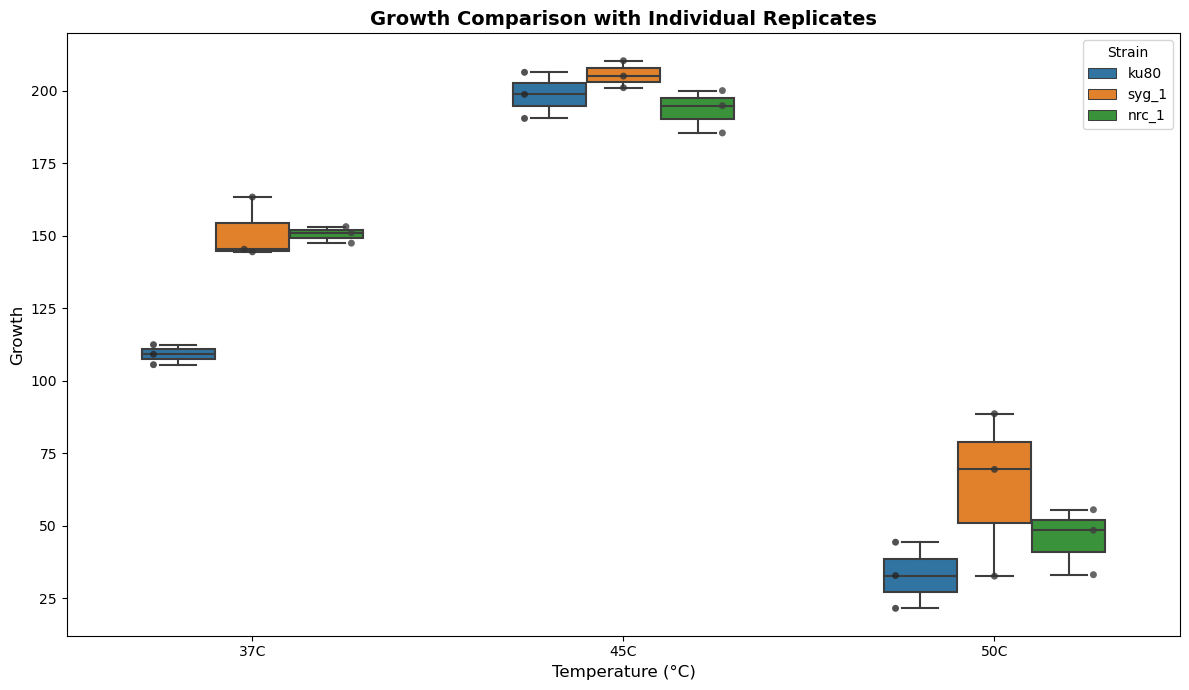

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load CSV
ffile_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_syg1_nrc1_growth_data-Copy1.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Convert to string types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-way ANOVA ===
model = ols('Growth ~ C(Strain) + C(Temperature) + C(Strain):C(Temperature)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-way ANOVA Table ===")
print(anova_table)

# === Tukey HSD ===
df["Group"] = df["Strain"] + "_" + df["Temperature"]
tukey_result = pairwise_tukeyhsd(endog=df["Growth"], groups=df["Group"], alpha=0.05)
print("\n=== Tukey HSD Results ===")
print(tukey_result)

# === Plotting: Boxplot + Swarmplot ===
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", width=0.6, fliersize=0)
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", dodge=True, color=".25", alpha=0.8)

plt.title("Growth Comparison with Individual Replicates", fontsize=14, fontweight='bold')
plt.ylabel("Growth", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=12)

# Fix duplicated legend from swarmplot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Strain")

plt.tight_layout()
plt.show()


### plot using normalized values from three biological replicate experiemnt (June 10 2025)

   Temperature Replicate   Growth Strain
0           37     Rep 1  10.9223   ku80
1           37     Rep 1  10.6019   ku80
2           37     Rep 1  10.2524   ku80
3           45     Rep 1  18.4951   ku80
4           45     Rep 1  20.0388   ku80


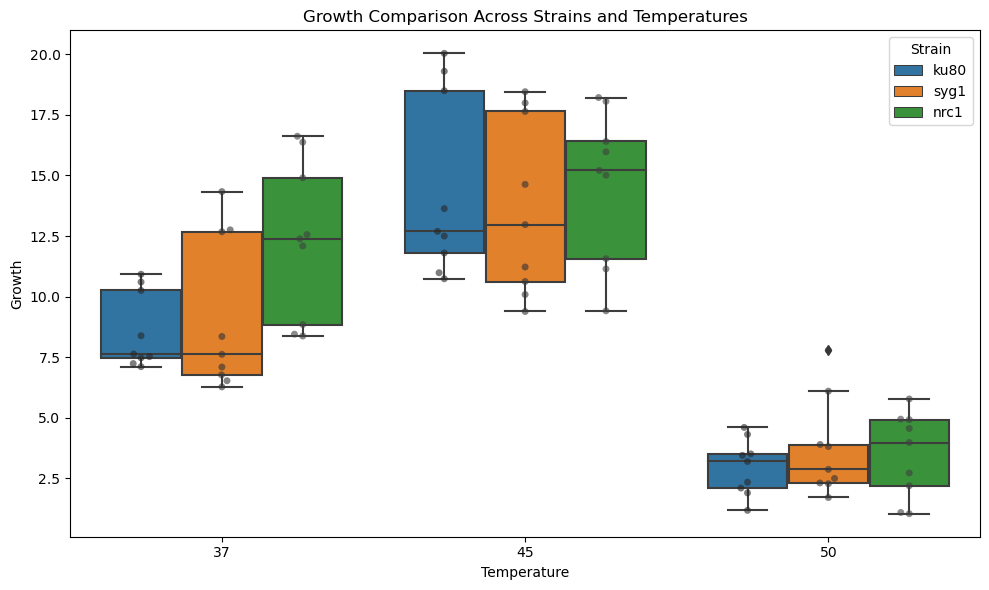

In [4]:
#Convert the date from Wide obatined in excel file to Long Format
import pandas as pd

# === Step 1: Manually recreate the data (or read from Excel with pd.read_excel if available) ===
# Example: Replace with pd.read_excel('your_file.xlsx') if using Excel

data_ku80 = {
    "Temperature": [37, 37, 37, 45, 45, 45, 50, 50, 50],
    "Rep 1": [10.9223, 10.6019, 10.2524, 18.4951, 20.0388, 19.3010, 3.1942, 4.3107, 2.0971],
    "Rep 2": [7.6324, 7.4706, 7.2353, 12.6912, 10.7353, 12.5, 2.3382, 1.8971, 1.1765],
    "Rep 3": [7.5231, 8.3846, 7.1077, 13.6308, 10.9846, 11.8, 3.5077, 3.4462, 4.6],
}
df_ku80 = pd.DataFrame(data_ku80).melt(id_vars="Temperature", var_name="Replicate", value_name="Growth")
df_ku80["Strain"] = "ku80"

# Repeat for syg1
data_syg1 = {
    "Temperature": [37, 37, 37, 45, 45, 45, 50, 50, 50],
    "Rep 1": [12.6754, 12.7544, 14.3333, 17.6404, 18.4561, 17.9912, 2.8684, 7.7807, 6.0965],
    "Rep 2": [8.3538, 7.6154, 7.0923, 12.9692, 14.6308, 9.3846, 1.7077, 2.3077, 2.2769],
    "Rep 3": [6.5263, 6.2737, 6.7684, 11.2211, 10.0842, 10.6210, 3.8105, 3.8947, 2.4947],
}
df_syg1 = pd.DataFrame(data_syg1).melt(id_vars="Temperature", var_name="Replicate", value_name="Growth")
df_syg1["Strain"] = "syg1"

# Repeat for nrc1
data_nrc1 = {
    "Temperature": [37, 37, 37, 45, 45, 45, 50, 50, 50],
    "Rep 1": [12.3852, 12.0902, 12.5574, 15.9754, 16.4016, 15.2049, 3.9754, 2.7213, 4.5574],
    "Rep 2": [8.4487, 8.8462, 8.3718, 11.5641, 11.1410, 9.4103, 1.0385, 2.1923, 1.0897],
    "Rep 3": [16.6176, 16.3725, 14.9020, 18.0588, 18.2157, 15.0098, 5.7745, 4.9412, 4.9216],
}
df_nrc1 = pd.DataFrame(data_nrc1).melt(id_vars="Temperature", var_name="Replicate", value_name="Growth")
df_nrc1["Strain"] = "nrc1"

# === Step 2: Combine all into one DataFrame ===
combined_df = pd.concat([df_ku80, df_syg1, df_nrc1], ignore_index=True)

# Optional: Save to CSV
combined_df.to_csv("formatted_normalized_growth_data_June_10_2025.csv", index=False)

# Preview
print(combined_df.head())

#Plotting the Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x="Temperature", y="Growth", hue="Strain")
sns.swarmplot(data=combined_df, x="Temperature", y="Growth", hue="Strain", dodge=True, color=".25", alpha=0.6)

# Fix duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Strain")

plt.title("Growth Comparison Across Strains and Temperatures from three replicates")
plt.tight_layout()
plt.show()



# Assays performed with condia stocks at -80C (07/28/2025)

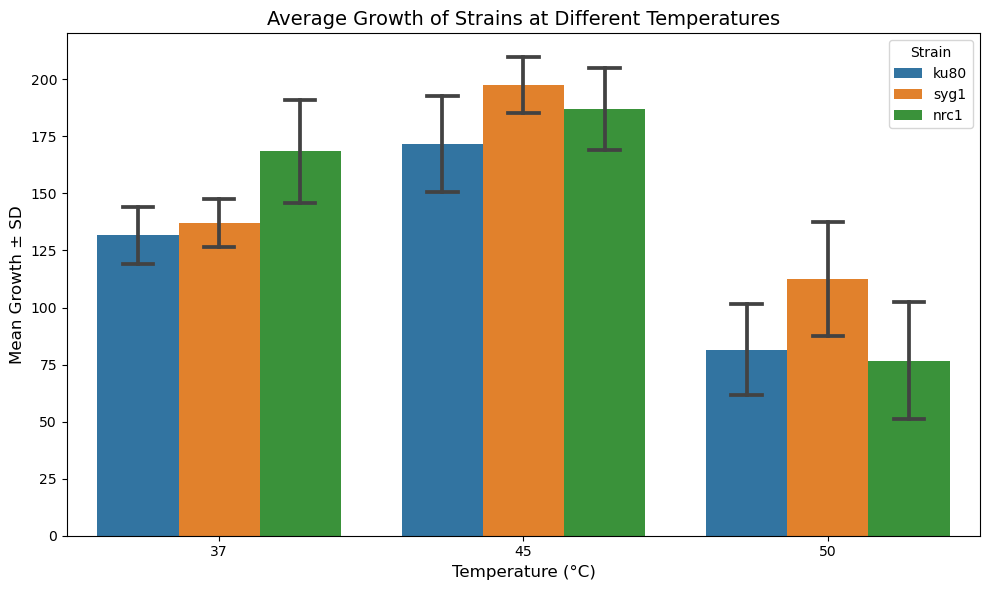

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the reformatted data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_nrc1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure temperature is treated as categorical
df["Temperature"] = df["Temperature"].astype(str)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Temperature", y="Growth", hue="Strain", ci="sd", capsize=0.1)

# Customize plot
plt.title("Average Growth of Strains at Different Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Mean Growth ± SD", fontsize=12)
plt.legend(title="Strain")
plt.tight_layout()
plt.show()


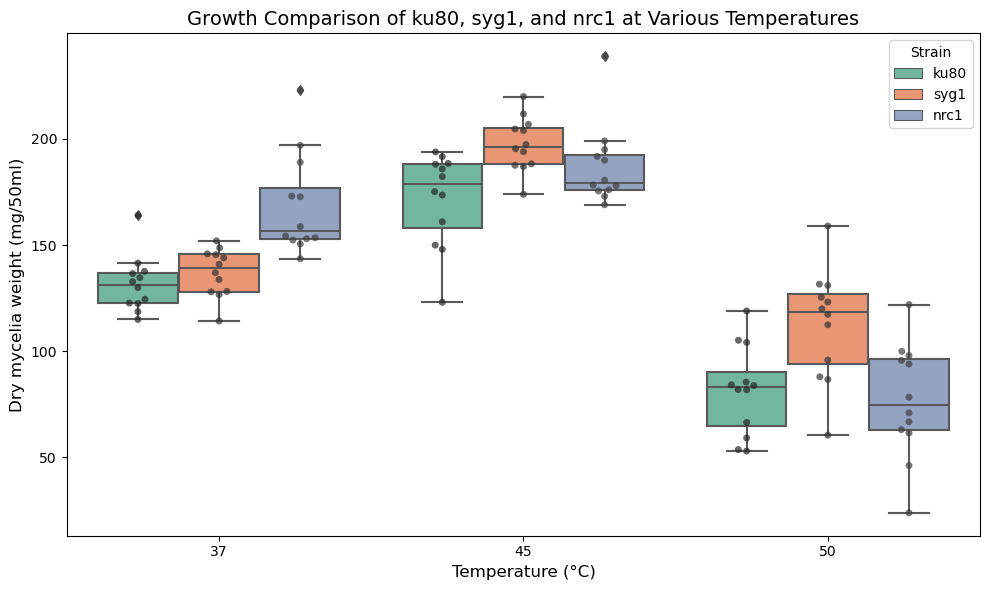

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load reformatted data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_nrc1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Make sure temperature is treated as a string/categorical
df["Temperature"] = df["Temperature"].astype(str)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7)

plt.title("Growth Comparison of ku80, syg1, and nrc1 at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Strain")
plt.tight_layout()
plt.show()


In [6]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.



=== Two-Way ANOVA ===
                                 sum_sq    df           F        PR(>F)
C(Strain)                   8443.069074   2.0   10.272799  8.831396e-05
C(Temperature)            164644.839074   2.0  200.325662  1.584614e-35
C(Strain):C(Temperature)   14136.244815   4.0    8.599883  5.340283e-06
Residual                   40683.352500  99.0         NaN           NaN

=== Tukey HSD Results ===
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
ku80_37 ku80_45    40.05 0.0002   13.8029  66.2971   True
ku80_37 ku80_50    -50.2    0.0  -76.4471 -23.9529   True
ku80_37 nrc1_37  36.6917 0.0008   10.4446  62.9387   True
ku80_37 nrc1_45  55.3917    0.0   29.1446  81.6387   True
ku80_37 nrc1_50 -55.0083    0.0  -81.2554 -28.7613   True
ku80_37 syg1_37   5.3667 0.9992  -20.8804  31.6137  False
ku80_37 syg1_45  65.8583    0.0   39.6113  92.1054   True
ku80_37 sy

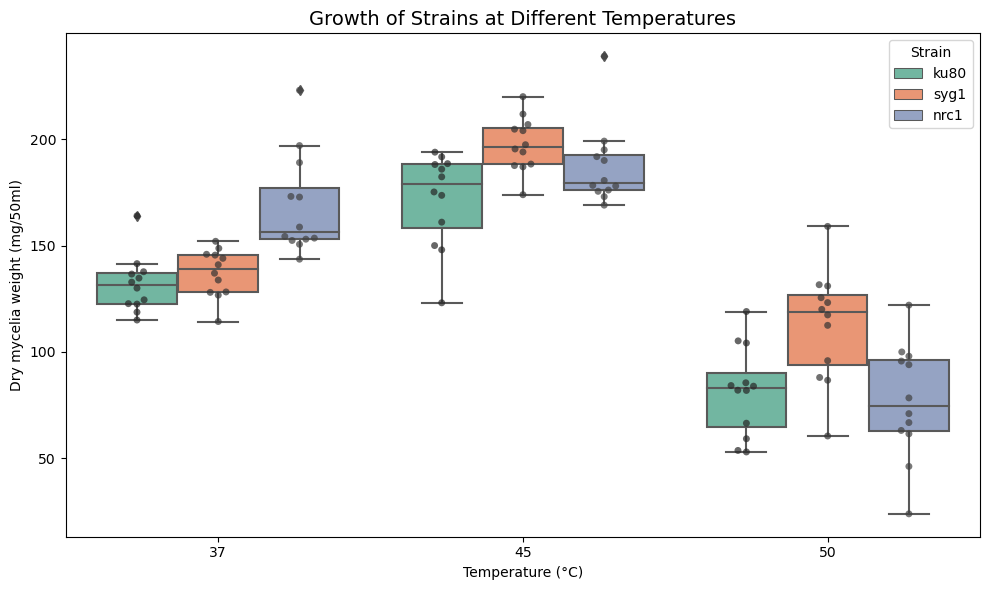

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statannot

# Load the reformatted dataset
df = pd.read_csv("reformatted_ku80_syg1_nrc1_data_July_28_2025.csv")
df["Temperature"] = df["Temperature"].astype(str)

# === Two-way ANOVA ===
model = ols("Growth ~ C(Strain) + C(Temperature) + C(Strain):C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-Way ANOVA ===")
print(anova_table)

# === Tukey HSD ===
df["Group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(df["Growth"], df["Group"])
print("\n=== Tukey HSD Results ===")
print(tukey)

# === Boxplot with Individual Data Points ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", dodge=True, color=".25", alpha=0.7)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Strain")

plt.title("Growth of Strains at Different Temperatures", fontsize=14)
plt.ylabel("Dry mycelia weight (mg/50ml)")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()


### For statistical annotation


=== Two-Way ANOVA ===
                                 sum_sq    df           F        PR(>F)
C(Strain)                   8443.069074   2.0   10.272799  8.831396e-05
C(Temperature)            164644.839074   2.0  200.325662  1.584614e-35
C(Strain):C(Temperature)   14136.244815   4.0    8.599883  5.340283e-06
Residual                   40683.352500  99.0         NaN           NaN

=== Tukey HSD Results ===
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
ku80_37 ku80_45    40.05 0.0002   13.8029  66.2971   True
ku80_37 ku80_50    -50.2    0.0  -76.4471 -23.9529   True
ku80_37 nrc1_37  36.6917 0.0008   10.4446  62.9387   True
ku80_37 nrc1_45  55.3917    0.0   29.1446  81.6387   True
ku80_37 nrc1_50 -55.0083    0.0  -81.2554 -28.7613   True
ku80_37 syg1_37   5.3667 0.9992  -20.8804  31.6137  False
ku80_37 syg1_45  65.8583    0.0   39.6113  92.1054   True
ku80_37 sy

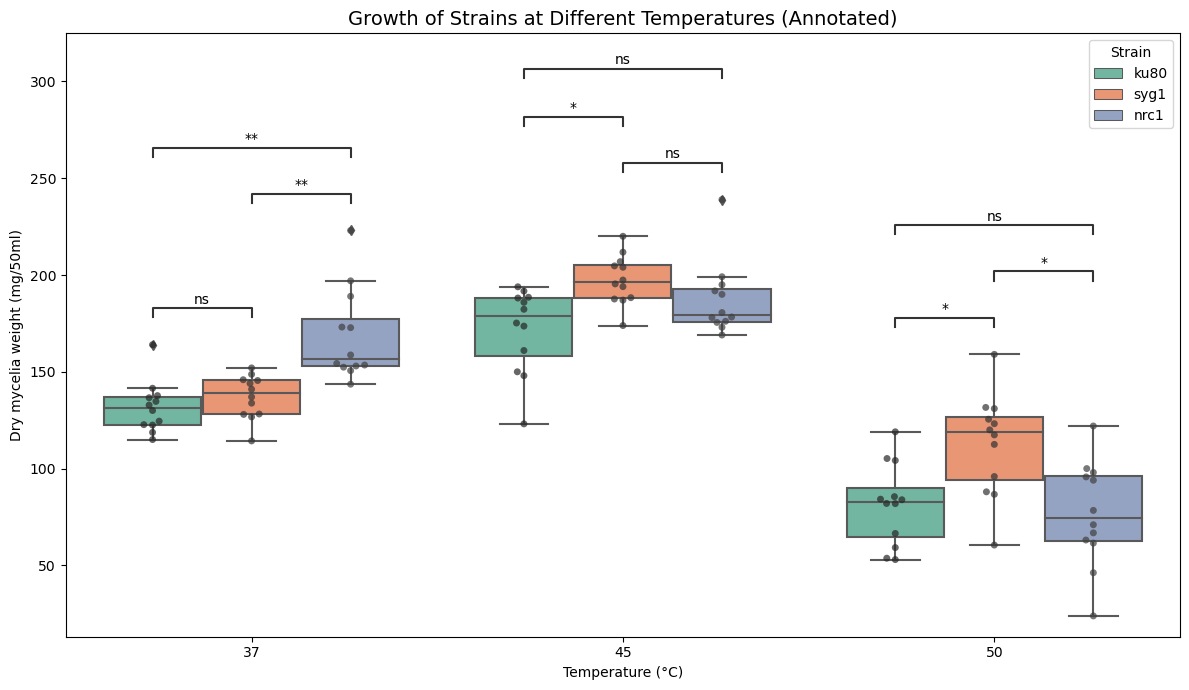

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannot import add_stat_annotation

# Load the reformatted dataset
df = pd.read_csv("reformatted_ku80_syg1_nrc1_data_July_28_2025.csv")
df["Temperature"] = df["Temperature"].astype(str)

# === Two-way ANOVA ===
model = ols("Growth ~ C(Strain) + C(Temperature) + C(Strain):C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-Way ANOVA ===")
print(anova_table)

# === Tukey HSD ===
df["Group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(df["Growth"], df["Group"])
print("\n=== Tukey HSD Results ===")
print(tukey)

# === Boxplot with Individual Data Points ===
plt.figure(figsize=(12, 7))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", dodge=True, color=".25", alpha=0.7)

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Strain")

# Define pairwise comparisons within each temperature
pairs = [
    (("37", "ku80"), ("37", "syg1")),
    (("37", "ku80"), ("37", "nrc1")),
    (("37", "syg1"), ("37", "nrc1")),
    (("45", "ku80"), ("45", "syg1")),
    (("45", "ku80"), ("45", "nrc1")),
    (("45", "syg1"), ("45", "nrc1")),
    (("50", "ku80"), ("50", "syg1")),
    (("50", "ku80"), ("50", "nrc1")),
    (("50", "syg1"), ("50", "nrc1")),
]

# Format data for statannot
df["TempStrain"] = list(zip(df["Temperature"], df["Strain"]))

add_stat_annotation(ax, data=df, x="Temperature", y="Growth", hue="Strain",
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star',
                    loc='inside', verbose=1, comparisons_correction="bonferroni")

plt.title("Growth of Strains at Different Temperatures (Annotated)", fontsize=14)
plt.ylabel("Dry mycelia weight (mg/50ml)")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()


## ku80 vs syg1 only

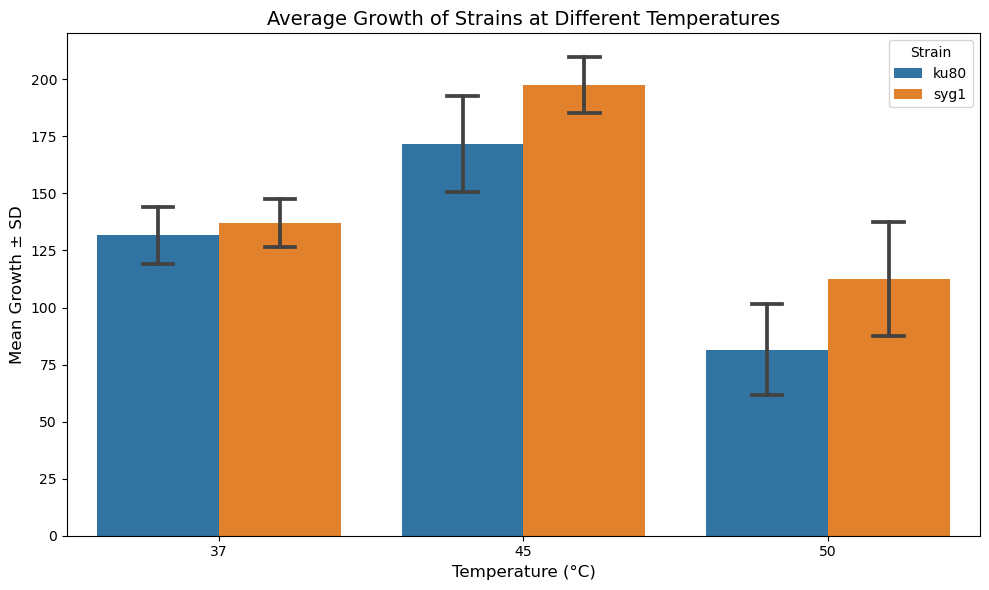

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the reformatted data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure temperature is treated as categorical
df["Temperature"] = df["Temperature"].astype(str)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Temperature", y="Growth", hue="Strain", ci="sd", capsize=0.1)

# Customize plot
plt.title("Average Growth of Strains at Different Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Mean Growth ± SD", fontsize=12)
plt.legend(title="Strain")
plt.tight_layout()
plt.show()


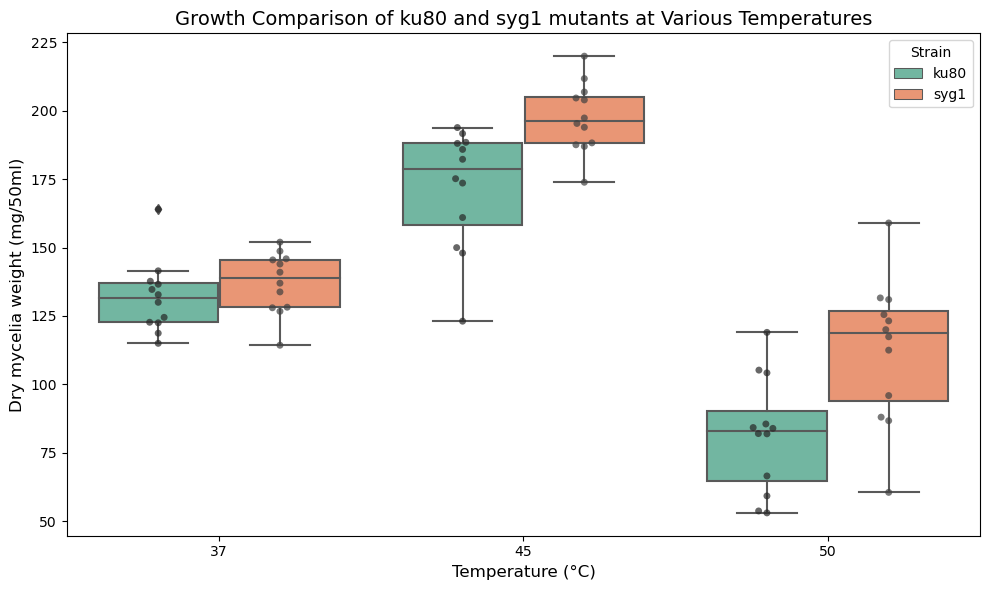

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure Temperature is categorical
df["Temperature"] = df["Temperature"].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")

# ✅ swarmplot without 'legend=False'
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Title and labels
plt.title("Growth Comparison of ku80 and syg1 mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)

# Fix the legend: only use the first 2 handles from boxplot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                                sum_sq    df           F        PR(>F)
C(Strain)                  7752.200139   1.0   22.652156  1.099083e-05
C(Temperature)            92780.055278   2.0  135.553020  4.252597e-24
C(Strain):C(Temperature)   2214.068611   2.0    3.234787  4.568900e-02
Residual                  22587.042500  66.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
ku80_37 ku80_45    40.05    0.0   17.8831  62.2169   True
ku80_37 ku80_50    -50.2    0.0  -72.3669 -28.0331   True
ku80_37 syg1_37   5.3667   0.98  -16.8002  27.5335  False
ku80_37 syg1_45  65.8583    0.0   43.6915  88.0252   True
ku80_37 syg1_50 -19.1167   0.13  -41.2835   3.0502  False
ku80_45 ku80_50   -90.25    0.0 -112.4169 -68.0831   True
ku80_45 syg1_37 -34.6833 0.0003  -56.8502 -12.5165   True
ku80_45 syg1_45  

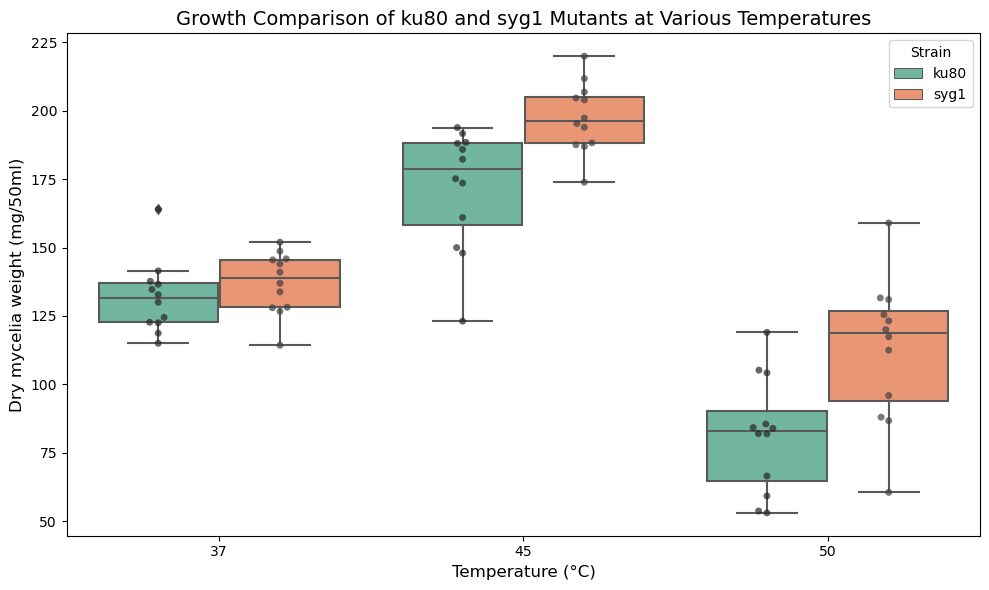

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure correct data types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Plotting ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and syg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

45_ku80 vs. 45_syg1: t-test independent samples, P_val:1.868e-03 t=-3.533e+00
37_ku80 vs. 37_syg1: t-test independent samples, P_val:2.909e-01 t=-1.082e+00
50_ku80 vs. 50_syg1: t-test independent samples, P_val:3.939e-03 t=-3.220e+00


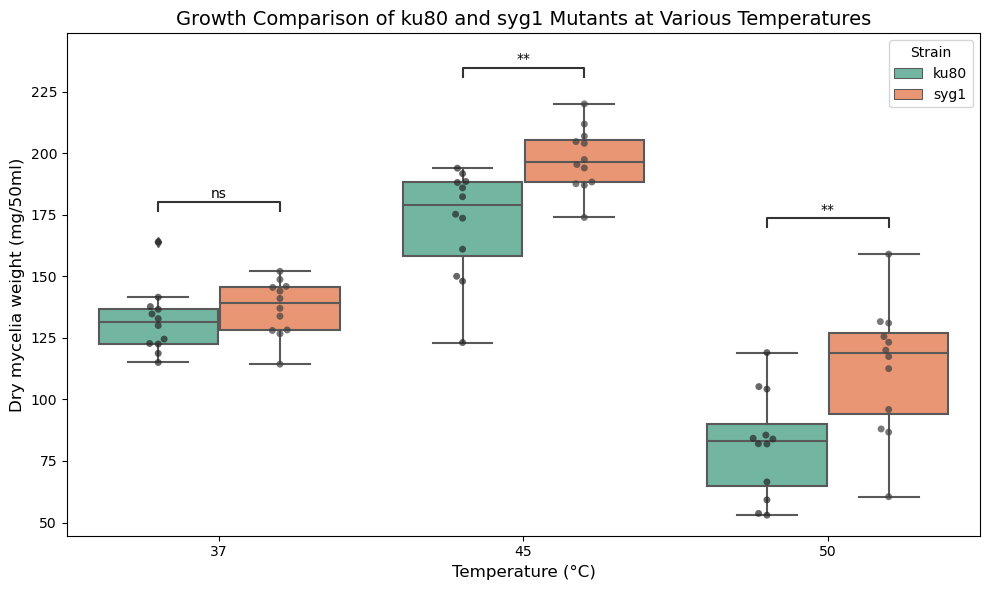

In [7]:
from statannotations.Annotator import Annotator

# Define pairs to compare
pairs = [
    (("37", "ku80"), ("37", "syg1")),
    (("45", "ku80"), ("45", "syg1")),
    (("50", "ku80"), ("50", "syg1"))
]

# Re-plot the base boxplot and swarmplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Annotator setup
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.title("Growth Comparison of ku80 and syg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### Syg1 without 45C


📊 Two-way ANOVA Results:
                                sum_sq    df          F        PR(>F)
C(Strain)                  3985.807500   1.0  11.282128  1.624179e-03
C(Temperature)            16732.800833   1.0  47.363452  1.702122e-08
C(Strain):C(Temperature)   1984.040833   1.0   5.615977  2.224771e-02
Residual                  15544.543333  44.0        NaN           NaN

📌 Tukey HSD Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
ku80_37 ku80_50    -50.2    0.0  -70.688 -29.712   True
ku80_37 syg1_37   5.3667 0.8968 -15.1213 25.8546  False
ku80_37 syg1_50 -19.1167 0.0753 -39.6046  1.3713  False
ku80_50 syg1_37  55.5667    0.0  35.0787 76.0546   True
ku80_50 syg1_50  31.0833 0.0011  10.5954 51.5713   True
syg1_37 syg1_50 -24.4833 0.0135 -44.9713 -3.9954   True
-------------------------------------------------------


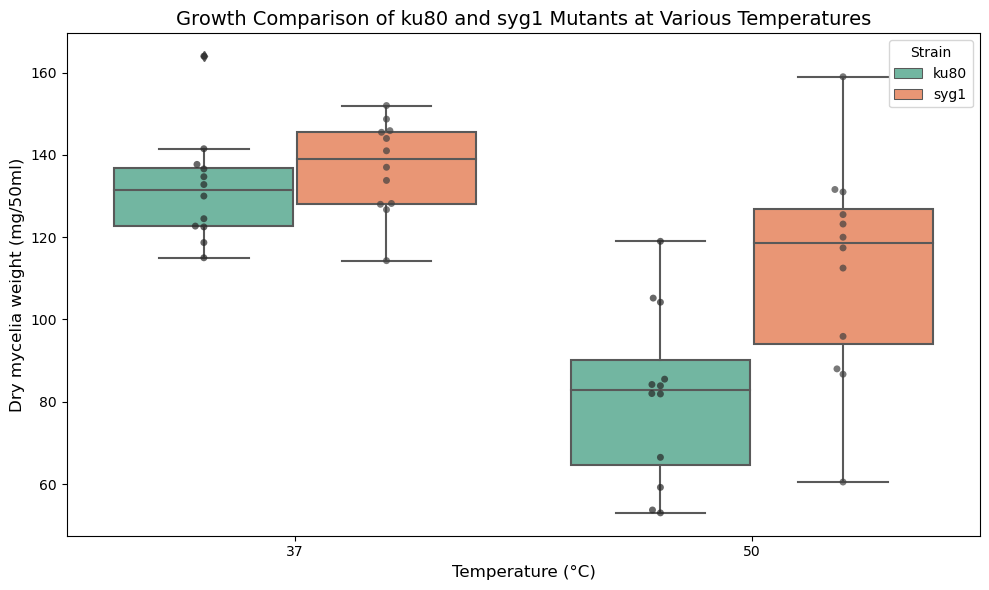

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_July_28_2025_without_45C.csv"
df = pd.read_csv(file_path)

# Ensure correct data types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Plotting ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and syg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

50_ku80 vs. 50_syg1: t-test independent samples, P_val:3.939e-03 t=-3.220e+00
37_ku80 vs. 37_syg1: t-test independent samples, P_val:2.909e-01 t=-1.082e+00


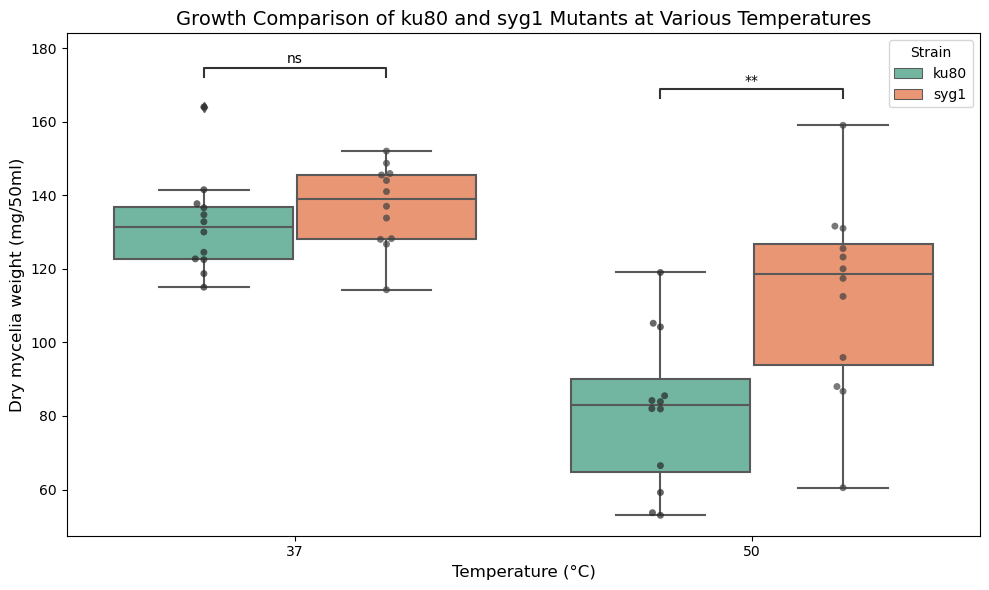

In [4]:
from statannotations.Annotator import Annotator

# Define pairs to compare
pairs = [
    (("37", "ku80"), ("37", "syg1")),
    (("50", "ku80"), ("50", "syg1"))
]

# Re-plot the base boxplot and swarmplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Annotator setup
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.title("Growth Comparison of ku80 and syg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                                sum_sq    df          F        PR(>F)
C(Strain)                  5175.053333   1.0  26.949436  5.113778e-06
C(Temperature)            19008.480000   1.0  98.987931  7.813995e-13
C(Strain):C(Temperature)   2845.920000   1.0  14.820319  3.791401e-04
Residual                   8449.243333  44.0        NaN           NaN

📌 Tukey HSD Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
ku80_37 ku80_50    -55.2    0.0 -70.3049 -40.0951   True
ku80_37 syg1_37   5.3667 0.7789  -9.7383  20.4716  False
ku80_37 syg1_50 -19.0333 0.0084 -34.1383  -3.9284   True
ku80_50 syg1_37  60.5667    0.0  45.4617  75.6716   True
ku80_50 syg1_50  36.1667    0.0  21.0617  51.2716   True
syg1_37 syg1_50    -24.4 0.0005 -39.5049  -9.2951   True
--------------------------------------------------------
p-value annotation legend:
     

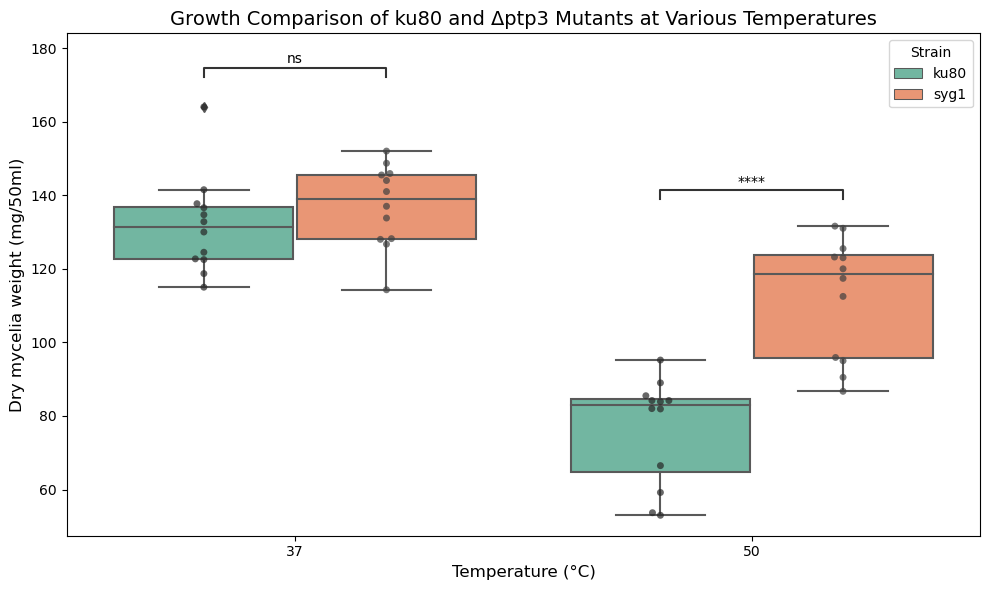

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_July_28_2025_without_45C-Copy1.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "syg1")),
    (("50", "ku80"), ("50", "syg1"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δptp3 Mutants at Various Temperatures",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### ku80 vs nrc1

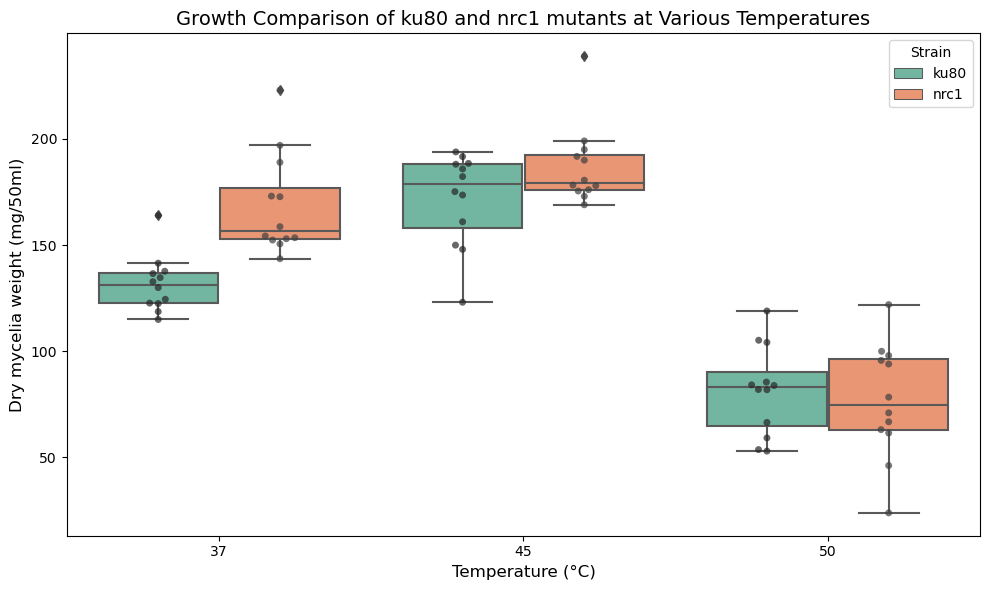

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_nrc1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure Temperature is categorical
df["Temperature"] = df["Temperature"].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")

# ✅ swarmplot without 'legend=False'
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Title and labels
plt.title("Growth Comparison of ku80 and nrc1 mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)

# Fix the legend: only use the first 2 handles from boxplot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                                sum_sq    df           F        PR(>F)
C(Strain)                   4460.40125   1.0    9.787749  2.614728e-03
C(Temperature)            127695.19000   2.0  140.104931  1.765015e-24
C(Strain):C(Temperature)    5168.19000   2.0    5.670448  5.338834e-03
Residual                   30077.03750  66.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
ku80_37 ku80_45    40.05 0.0003   14.4705  65.6295   True
ku80_37 ku80_50    -50.2    0.0  -75.7795 -24.6205   True
ku80_37 nrc1_37  36.6917 0.0011   11.1122  62.2712   True
ku80_37 nrc1_45  55.3917    0.0   29.8122  80.9712   True
ku80_37 nrc1_50 -55.0083    0.0  -80.5878 -29.4288   True
ku80_45 ku80_50   -90.25    0.0 -115.8295 -64.6705   True
ku80_45 nrc1_37  -3.3583 0.9988  -28.9378  22.2212  False
ku80_45 nrc1_45  

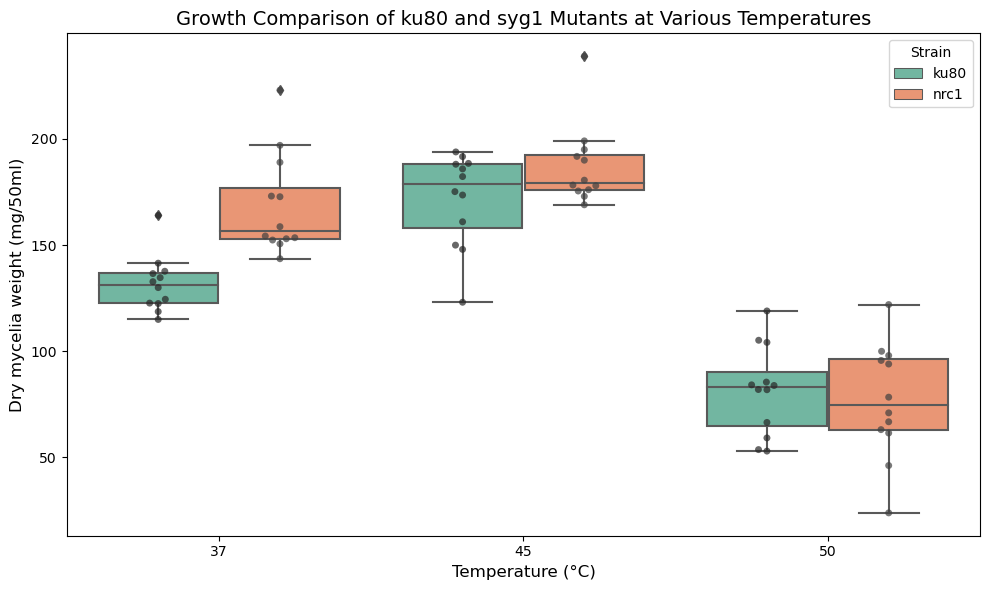

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_nrc1_data_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure correct data types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Plotting ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and syg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

45_ku80 vs. 45_nrc1: t-test independent samples, P_val:7.962e-02 t=-1.838e+00
37_ku80 vs. 37_nrc1: t-test independent samples, P_val:1.122e-04 t=-4.689e+00
50_ku80 vs. 50_nrc1: t-test independent samples, P_val:6.301e-01 t=4.884e-01


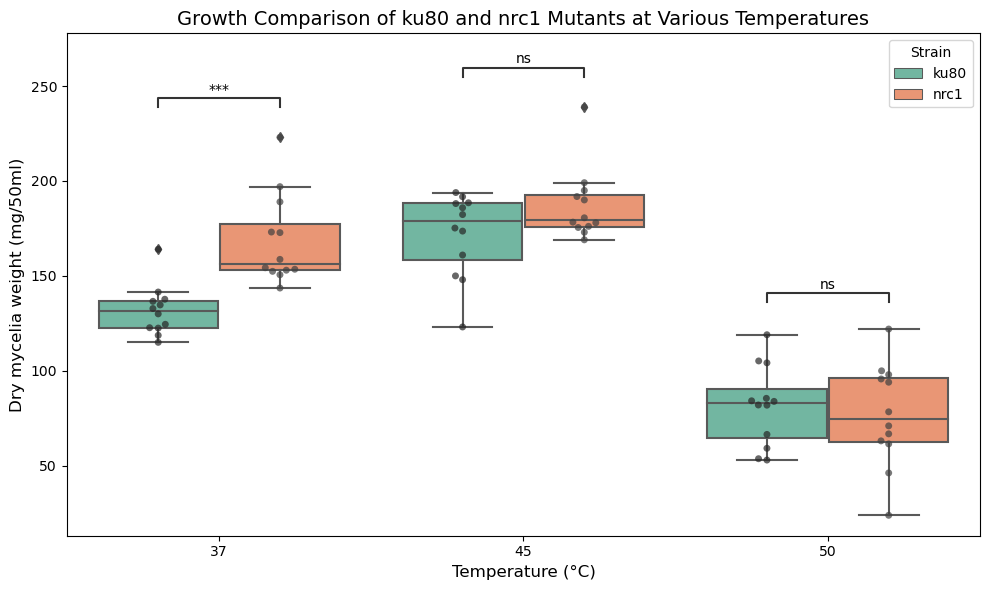

In [9]:
from statannotations.Annotator import Annotator

# Define pairs to compare
pairs = [
    (("37", "ku80"), ("37", "nrc1")),
    (("45", "ku80"), ("45", "nrc1")),
    (("50", "ku80"), ("50", "nrc1"))
]

# Re-plot the base boxplot and swarmplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Annotator setup
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.title("Growth Comparison of ku80 and nrc1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


## ku80 vs ptp3 mutant


📊 Two-way ANOVA Results:
                                 sum_sq    df           F        PR(>F)
C(Strain)                   4408.485926   1.0   11.111284  1.512035e-03
C(Temperature)            110413.047937   2.0  139.144233  1.169507e-22
C(Strain):C(Temperature)    2475.861693   2.0    3.120119  5.177483e-02
Residual                   22615.180000  57.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
ku80_37 ku80_45   24.4778 0.1122   -3.2114  52.1669  False
ku80_37 ku80_50  -59.6667    0.0  -87.3558 -31.9775   True
ku80_37 ptp3_37  -21.3944 0.1615  -47.2953   4.5064  False
ku80_37 ptp3_45   24.8389 0.0673   -1.0619  50.7397  False
ku80_37 ptp3_50  -89.3444    0.0 -115.2453 -63.4436   True
ku80_45 ku80_50  -84.1444    0.0 -111.8336 -56.4553   True
ku80_45 ptp3_37  -45.8722    0.0   -71.773 -19.9714   True
ku

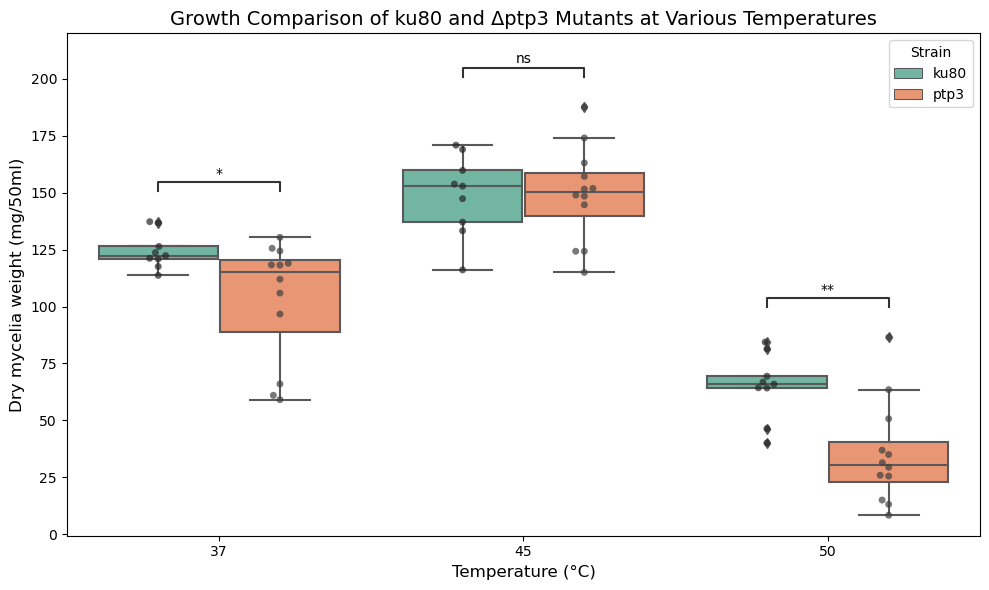

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_vs_ptp3_growth.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "ptp3")),
    (("45", "ku80"), ("45", "ptp3")),
    (("50", "ku80"), ("50", "ptp3"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δptp3 Mutants at Various Temperatures",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### Ku80 vs ptp3 without 45C


📊 Two-way ANOVA Results:
                                sum_sq    df           F        PR(>F)
C(Strain)                  7634.671746   1.0   22.968864  2.532446e-05
C(Temperature)            46227.703810   1.0  139.075769  2.881309e-14
C(Strain):C(Temperature)    352.002857   1.0    1.058998  3.099497e-01
Residual                  12630.904444  38.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
ku80_37 ku80_50 -59.6667    0.0  -82.7555 -36.5778   True
ku80_37 ptp3_37 -21.3944  0.053  -42.9921   0.2032  False
ku80_37 ptp3_50 -92.7611    0.0 -114.3587 -71.1635   True
ku80_50 ptp3_37  38.2722 0.0002   16.6746  59.8698   True
ku80_50 ptp3_50 -33.0944 0.0011  -54.6921 -11.4968   True
ptp3_37 ptp3_50 -71.3667    0.0  -91.3622 -51.3711   True
---------------------------------------------------------
p-value annotatio

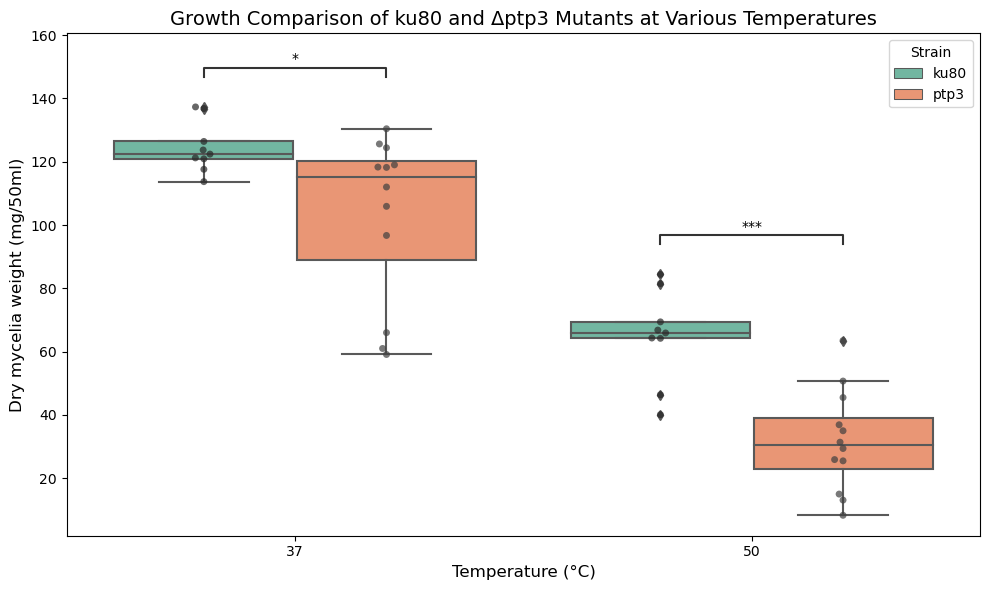

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_vs_ptp3_growth_without_45C.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "ptp3")),
    (("50", "ku80"), ("50", "ptp3"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δptp3 Mutants at Various Temperatures",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


## ku80 vs cmr1


📊 Two-way ANOVA Results:
                                 sum_sq    df           F        PR(>F)
C(Strain)                  17315.671442   1.0   96.013206  7.882923e-14
C(Temperature)            102913.212381   2.0  285.320366  2.030797e-30
C(Strain):C(Temperature)    3151.898915   2.0    8.738440  4.895773e-04
Residual                   10279.765833  57.0         NaN           NaN

📌 Tukey HSD Results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
cmr_1_37 cmr_1_45  57.9583    0.0   41.7913  74.1254   True
cmr_1_37 cmr_1_50 -51.7917    0.0  -67.9587 -35.6246   True
cmr_1_37  ku80_37  47.2861    0.0   29.8237  64.7486   True
cmr_1_37  ku80_45  71.7639    0.0   54.3014  89.2263   True
cmr_1_37  ku80_50 -12.3806 0.3067   -29.843   5.0819  False
cmr_1_45 cmr_1_50  -109.75    0.0 -125.9171 -93.5829   True
cmr_1_45  ku80_37 -10.6722 0.4726  -28.1347   6.7902

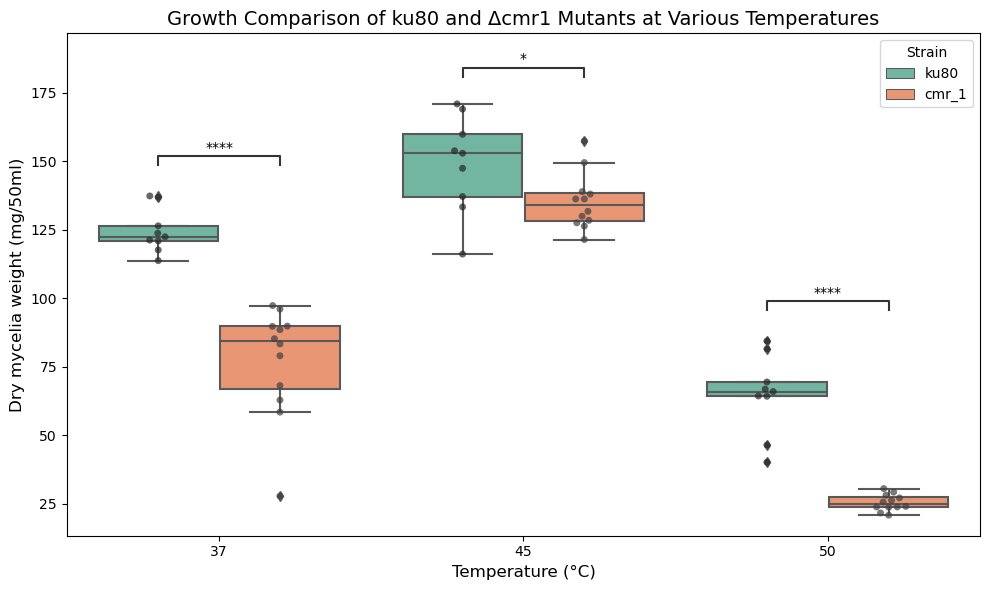

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/ku80_vs_cmr1_growth.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "cmr_1")),
    (("45", "ku80"), ("45", "cmr_1")),
    (("50", "ku80"), ("50", "cmr_1"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δcmr1 Mutants at Various Temperatures",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### ku80 vs mfs (37 oC pregermination)


📊 Two-way ANOVA Results:
                                sum_sq    df          F        PR(>F)
C(Strain)                 24066.351111   1.0  66.047741  4.514549e-09
C(Temperature)            45354.077222   2.0  62.234909  2.109426e-11
C(Strain):C(Temperature)    798.803889   2.0   1.096119  3.471771e-01
Residual                  10931.343333  30.0        NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
ku80_37 ku80_45     31.65 0.0729    -1.871   65.171  False
ku80_37 ku80_50     -50.6  0.001   -84.121  -17.079   True
ku80_37  mfs_37  -63.8833    0.0  -97.4043 -30.3623   True
ku80_37  mfs_45   -9.2833 0.9569  -42.8043  24.2377  False
ku80_37  mfs_50 -100.9167    0.0 -134.4377 -67.3957   True
ku80_45 ku80_50    -82.25    0.0  -115.771  -48.729   True
ku80_45  mfs_37  -95.5333    0.0 -129.0543 -62.0123   True
ku80_45  mfs

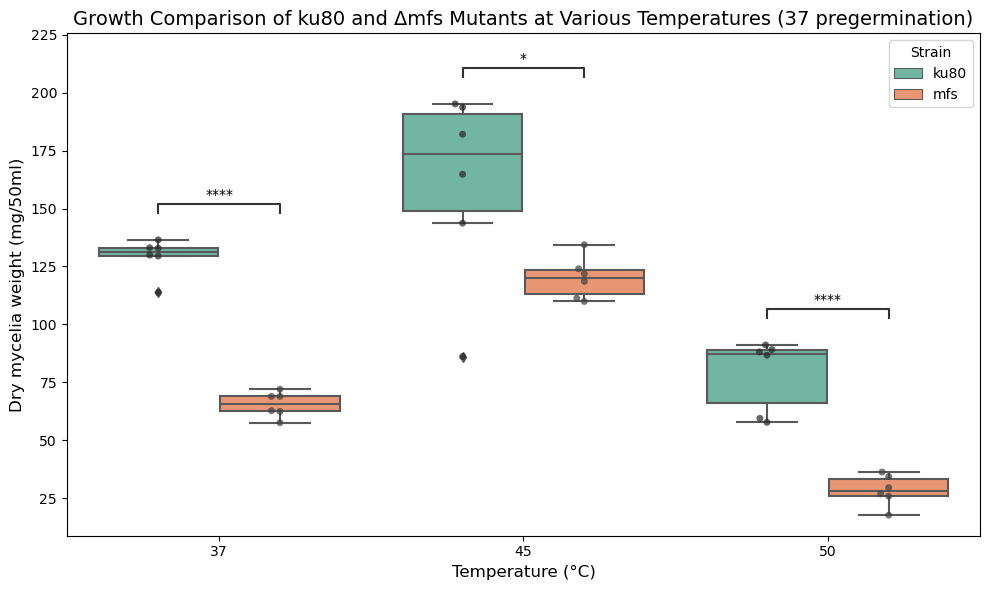

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_mfs_growth_37_pregerm_raw.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "mfs")),
    (("45", "ku80"), ("45", "mfs")),
    (("50", "ku80"), ("50", "mfs"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δmfs Mutants at Various Temperatures (37 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### ku80 vs zip (37 oC pregermination)


📊 Two-way ANOVA Results:
                            sum_sq    df          F        PR(>F)
C(Strain)                 13876.84   1.0  21.136965  7.241358e-05
C(Temperature)            45384.08   2.0  34.564126  1.636278e-08
C(Strain):C(Temperature)    459.98   2.0   0.350317  7.073083e-01
Residual                  19695.60  30.0        NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
ku80_37 ku80_45     31.65 0.2952   -13.345   76.645  False
ku80_37 ku80_50     -50.6 0.0204   -95.595   -5.605   True
ku80_37  zip_37  -47.8333 0.0321  -92.8284  -2.8383   True
ku80_37  zip_45    1.3167    1.0  -43.6784  46.3117  False
ku80_37  zip_50  -90.2333    0.0 -135.2284 -45.2383   True
ku80_45 ku80_50    -82.25 0.0001  -127.245  -37.255   True
ku80_45  zip_37  -79.4833 0.0001 -124.4784 -34.4883   True
ku80_45  zip_45  -30.3333 0.3393

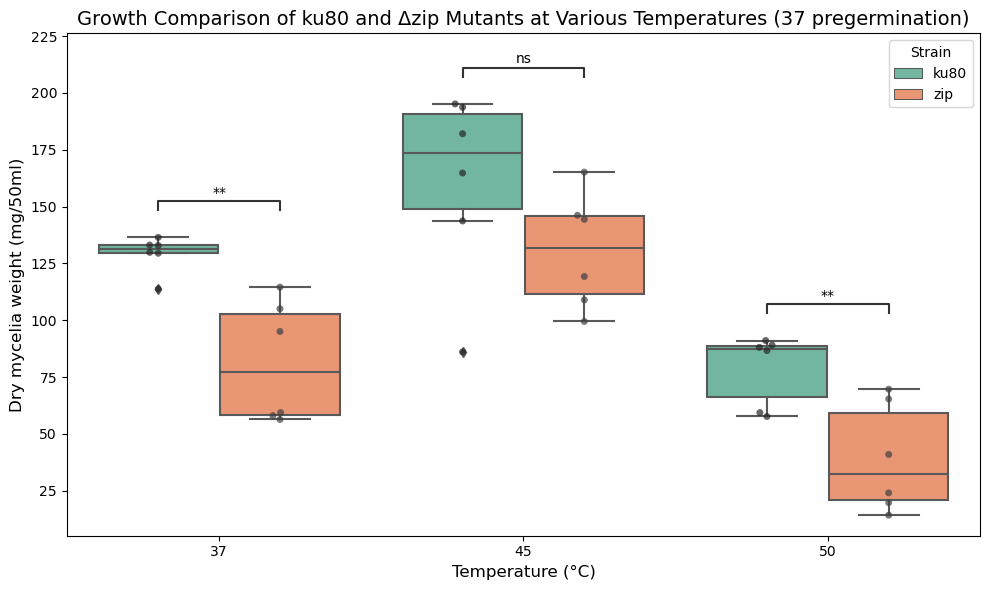

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_zip_growth_37_pregerm_raw.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "zip")),
    (("45", "ku80"), ("45", "zip")),
    (("50", "ku80"), ("50", "zip"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δzip Mutants at Various Temperatures (37 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### ku80 vs mfs (45 oC pregermination)


📊 Two-way ANOVA Results:
                                sum_sq    df           F        PR(>F)
C(Strain)                  1606.115741   1.0    8.058165  6.621484e-03
C(Temperature)            83104.057778   2.0  208.473830  2.148286e-24
C(Strain):C(Temperature)   1708.165926   2.0    4.285084  1.939503e-02
Residual                   9567.135556  48.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
ku80_37 ku80_45   74.7111    0.0    54.959  94.4632   True
ku80_37 ku80_50  -20.9667 0.0315  -40.7187  -1.2146   True
ku80_37  mfs_37    4.9444 0.9754  -14.8076  24.6965  False
ku80_37  mfs_45   54.7222    0.0   34.9702  74.4743   True
ku80_37  mfs_50  -38.6444    0.0  -58.3965 -18.8924   True
ku80_45 ku80_50  -95.6778    0.0 -115.4298 -75.9257   True
ku80_45  mfs_37  -69.7667    0.0  -89.5187 -50.0146   True
ku80_45

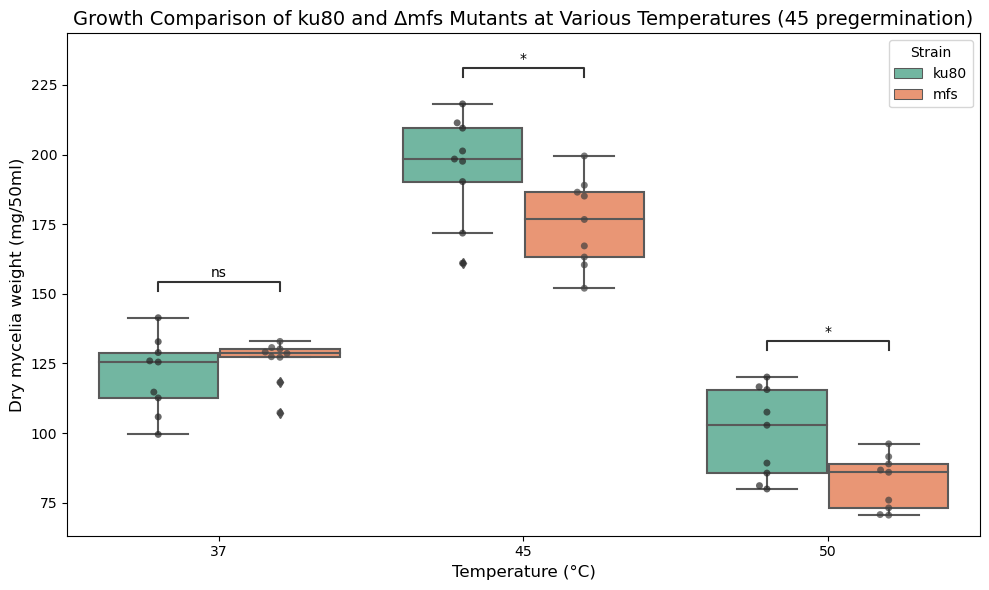

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_mfs_growth_45_pregerm_raw.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "mfs")),
    (("45", "ku80"), ("45", "mfs")),
    (("50", "ku80"), ("50", "mfs"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δmfs Mutants at Various Temperatures (45 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### ku80 vs zip (45 oC pregermination)


📊 Two-way ANOVA Results:
                                sum_sq    df          F        PR(>F)
C(Strain)                 11504.800741   1.0  16.305292  1.932840e-04
C(Temperature)            77015.080370   2.0  54.575192  4.347294e-13
C(Strain):C(Temperature)    500.860370   2.0   0.354925  7.030510e-01
Residual                  33868.171111  48.0        NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
ku80_37 ku80_45   72.4889    0.0   35.3253 109.6525   True
ku80_37 ku80_50  -12.0778 0.9268  -49.2414  25.0858  False
ku80_37  zip_37  -21.5889 0.5232  -58.7525  15.5747  False
ku80_37  zip_45      43.0 0.0148    5.8364  80.1636   True
ku80_37  zip_50  -48.5778 0.0041  -85.7414 -11.4142   True
ku80_45 ku80_50  -84.5667    0.0 -121.7302 -47.4031   True
ku80_45  zip_37  -94.0778    0.0 -131.2414 -56.9142   True
ku80_45  zip

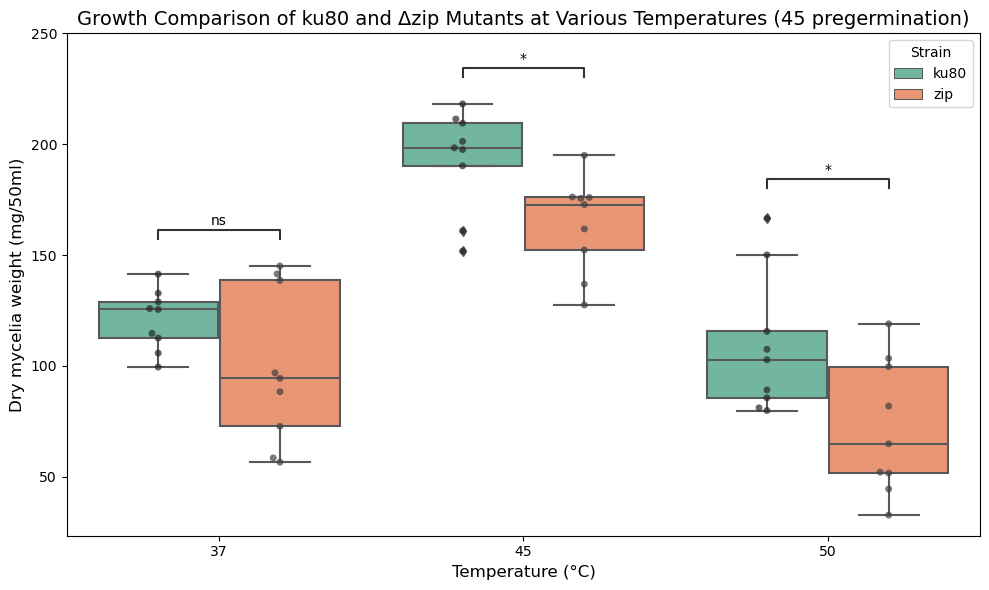

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_zip_growth_45_pregerm_raw.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "zip")),
    (("45", "ku80"), ("45", "zip")),
    (("50", "ku80"), ("50", "zip"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δzip Mutants at Various Temperatures (45 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


## ku80 vs zincTF (45 oC pregermination)


📊 Two-way ANOVA Results:
                                 sum_sq    df          F        PR(>F)
C(Strain)                    631.954286   1.0   0.277480  6.004018e-01
C(Temperature)             81712.432698   2.0  17.939237  9.054278e-07
C(Strain):C(Temperature)    6823.474524   2.0   1.498033  2.322385e-01
Residual                  129816.241667  57.0        NaN           NaN

📌 Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
ZincTF_37 ZincTF_45  46.1917  0.184  -11.2603 103.6436  False
ZincTF_37 ZincTF_50  -27.975 0.7053  -85.4269  29.4769  False
ZincTF_37   ku80_37 -33.8722 0.5958  -95.9274  28.1829  False
ZincTF_37   ku80_45  63.3944 0.0425    1.3393 125.4496   True
ZincTF_37   ku80_50 -30.5056 0.6969  -92.5607  31.5496  False
ZincTF_45 ZincTF_50 -74.1667 0.0045 -131.6186 -16.7147   True
ZincTF_45   ku80_37 -80.0639 0.0045 -14

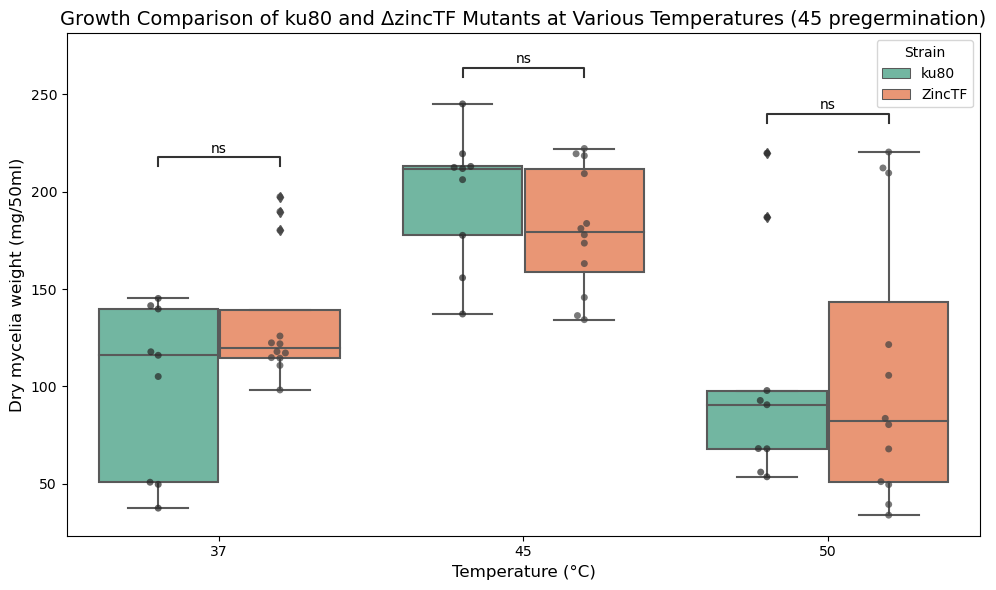

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_zincTF_growth_45_pregerm_raw.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "ZincTF")),
    (("45", "ku80"), ("45", "ZincTF")),
    (("50", "ku80"), ("50", "ZincTF"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and ΔzincTF Mutants at Various Temperatures (45 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                                 sum_sq    df          F        PR(>F)
C(Strain)                    105.367867   1.0   0.114667  7.363387e-01
C(Temperature)            131587.973844   2.0  71.600686  2.869262e-15
C(Strain):C(Temperature)    2604.727262   2.0   1.417305  2.521263e-01
Residual                   45026.179960  49.0        NaN           NaN

📌 Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
ZincTF_37 ZincTF_45   64.4861 0.0002   24.8474 104.1248   True
ZincTF_37 ZincTF_50  -45.6111 0.0281  -87.9867  -3.2356   True
ZincTF_37   ku80_37  -15.5778  0.883  -57.9533  26.7978  False
ZincTF_37   ku80_45   81.6889    0.0   39.3133 124.0644   True
ZincTF_37   ku80_50  -40.6698 0.1018  -85.9712   4.6315  False
ZincTF_45 ZincTF_50 -110.0972    0.0 -149.7359 -70.4585   True
ZincTF_45   ku80_37  -80.0639 

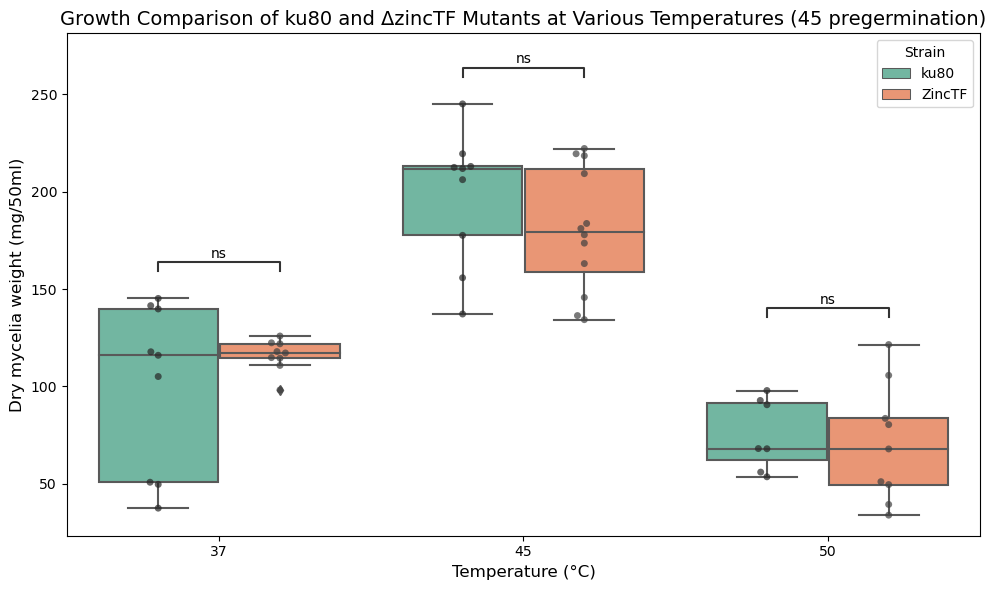

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_zincTF_growth_45_pregerm_raw-Copy1.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "ZincTF")),
    (("45", "ku80"), ("45", "ZincTF")),
    (("50", "ku80"), ("50", "ZincTF"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and ΔzincTF Mutants at Various Temperatures (45 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


## ku80 vs uncha2 (45 oC pregermination)


📊 Two-way ANOVA Results:
                                 sum_sq    df          F        PR(>F)
C(Strain)                   1900.954286   1.0   0.898334  3.472300e-01
C(Temperature)             89012.912698   2.0  21.032413  1.441213e-07
C(Strain):C(Temperature)    8068.824524   2.0   1.906542  1.579495e-01
Residual                  120617.071667  57.0        NaN           NaN

📌 Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
  ku80_37   ku80_45  97.2667 0.0005   33.3206 161.2127   True
  ku80_37   ku80_50   3.3667    1.0  -60.5794  67.3127  False
  ku80_37 uncha2_37  42.9139 0.2941  -16.9022 102.7299  False
  ku80_37 uncha2_45  87.4222 0.0009   27.6062 147.2383   True
  ku80_37 uncha2_50   3.5972    1.0  -56.2188  63.4133  False
  ku80_45   ku80_50    -93.9 0.0008 -157.8461 -29.9539   True
  ku80_45 uncha2_37 -54.3528 0.0953 -11

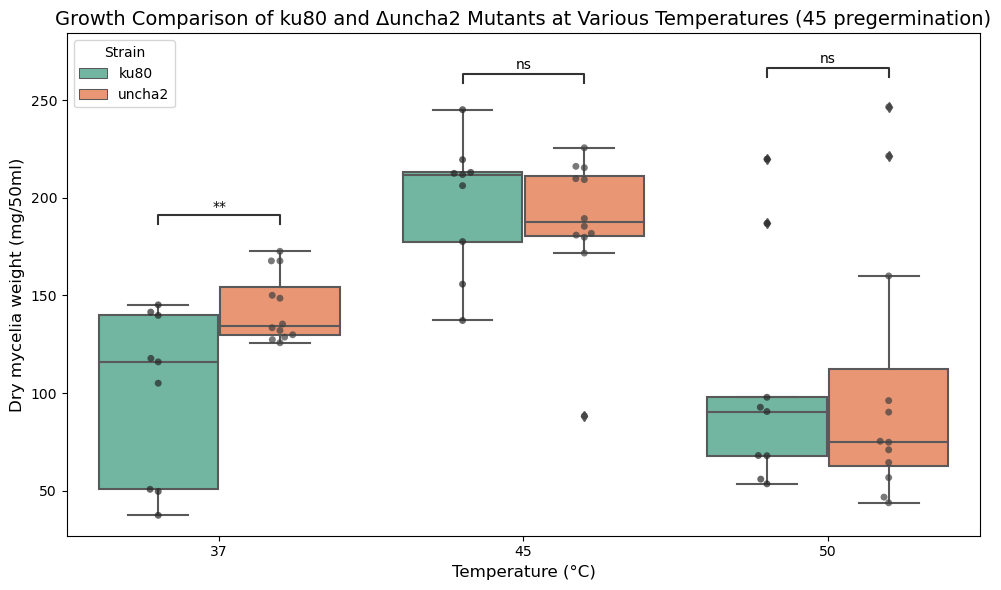

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_uncha2_growth_45_pregerm_raw.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "uncha2")),
    (("45", "ku80"), ("45", "uncha2")),
    (("50", "ku80"), ("50", "uncha2"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δuncha2 Mutants at Various Temperatures (45 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_uncha2_growth_45_pregerm_raw-Copy1.csv"
df = pd.read_csv(file_path)

# Ensure correct types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Define pairs for annotation (t-tests) ===
pairs = [
    (("37", "ku80"), ("37", "uncha2")),
    (("45", "ku80"), ("45", "uncha2")),
    (("50", "ku80"), ("50", "uncha2"))
]

# === Plot with annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Significance annotations
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δuncha2 Mutants at Various Temperatures (45 pregermination)",
          fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                                 sum_sq    df          F        PR(>F)
C(Strain)                   2278.701086   1.0   2.248803  1.396514e-01
C(Temperature)            128258.935164   2.0  63.288057  9.030742e-15
C(Strain):C(Temperature)    7720.695073   2.0   3.809698  2.845136e-02
Residual                   53704.631516  53.0        NaN           NaN

📌 Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
  ku80_37   ku80_45   97.2667    0.0   52.9018 141.6316   True
  ku80_37   ku80_50  -25.0921 0.6251  -72.5201   22.336  False
  ku80_37 uncha2_37   42.9139 0.0388    1.4143  84.4135   True
  ku80_37 uncha2_45   87.4222    0.0   45.9227 128.9218   True
  ku80_37 uncha2_50  -22.3978  0.646  -65.6393  20.8438  False
  ku80_45   ku80_50 -122.3587    0.0 -169.7868 -74.9307   True
  ku80_45 uncha2_37  -54.3528 